<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Workshop SWDB 2023 </h1> 
<h3 align="center">Friday, August 25th, 2023</h3>
<h3 align="center">Problem Set</h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 1. Consider other ways by which we can encode features in the models. Instead of using categorical one-hot encoding (which is an 8-dimensional vector) for stimulus orientation, we may use the scalar value of orientation directly as the regressor. What are potential benefits and limitations of different feature encoding methods? </h2>

<p>
    
<li> Fit the regression models introduced in the worskshop, but using the scalar orientation value for the stimulus regressor. Can they capture the orientation/ direction selectivity potentially demonstrated by the neurons?
<li> Compare and contrast the models you get with the ones in the workshop. Can you speculate what leads to the difference?
<li> Discuss the pros and cons of this approach. What do you think should be considered when deciding on how to encode a feature in a regression model?
<li> (solution provided)
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 2. Consider nonlinear relationships between neural responses and features. How can we extend the regression model to capture this relationship? Some examples include: regression with sine/ cosine basis of orientation value, polynomials basis, or parametrized nonlinear function (e.g. Von Mises). How do they compare and contrast? </h2>

<p>
    
<li> Review materials on polynomial regression introduced on Day 1. How do you modify it to encode orientations? (Hint: orientation is circular variable which repeats itself after $[0, 2 \pi]$. Consider sine/cosine functions, or <a href="https://en.wikipedia.org/wiki/Von_Mises_distribution">Von Mises function </a>
<li> Run regression models with nonlinear bases of orientation. What does it tell us about how the neurons are driven by stimulus?

<li> Compare and contrast models with nonlinear bases with the ones we have in thr tutorial. What are some benefits and limitations of this approach?

<li> (solution provided)
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 3. Linear regression models assume Gaussian noise for the data. Do you think this assumption applies to the data set? Consider models with non-Gaussian noise/ non-MSE loss. Do they explain more variability? </h2>

<p>
    
<li> Generalized Linear Model (GLM) is a modeling framework for non-Gaussian noise. Check the <a href="https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models">scikit-learn GLM package</a> for introduction to the model, implementation, and use of the library.

<li> To properly set up the design matrix, think thoroughly on how to encode the orientation stimulus (both its value and its time course)

<li> Examine the filters derived from the fitted GLM. Do they tell us anything about what is driving the neural responses and how? How does it compare to our previous analyses using tuning curves, linear regression, and other methods?

<li> Include inter-neuron interactions in the GLM. What does it tell us about the influence of one neuron on another? 
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 4. Try modeling with even more neurons per area, and with more brain areas. As we include more neurons in the model, we inevitably run into issues with a large parameter space (the curse of dimensionality). Consider applying dimensionality reduction techniques to reduce the neuron space into smaller latent space. How can we visualized and interpret the models? </h2>

<p>
    
<li> Apply dimensionality reduction methods (e.g. Principal Component Analysis introduced on Day 2) to each brain area.

<li> Fit regression models with the reduced components derived for each brain area.

<li> Visualize the functional connectivity among different brain areas.

<li> ** Consider methods that jointly reduce dimensionality and generate predictions. For example, Reduced Rank Regression (RRR) fit a regression model and constraint the dimensionality of the weight matrix at the same time. (the so-called "communication subspace" - find more information <a href="https://www.sciencedirect.com/science/article/pii/S0896627319300534">here</a>)
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 5. Regression models require careful choice of bases to be effective. Another (increasingly popular) approach would be using recurrent neural network (RNN) to build dynamical models for neural responses. Try implementing RNN models for predicting neural responses. What do you think would be a good network architecture choice? Why? How could you verify? </h2>

<p>
    
<li> In fact Model 6 from the workshop could be seen as an extremely simple fully linear RNN without nonlinear activation. Conisder starting by adding nonlinear activation function to the model.

<li> <a href="https://pytorch.org/tutorials/">Pytorch</a> is useful for implementation of RNN. For tutorial on setting up and training RNN, we recommend <a href="https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch">Kaggle tutorial</a> and <a href="https://github.com/gyyang/nn-brain/blob/master/RNN_tutorial.ipynb">Guangyu Robert Yang's tutorial</a> as helpful reference for starting point.

<li> Plot the training and testing loss. Do you run into the issue of underfitting or overfitting? How can you identify them? How would you solve them?

<li> RNN architecture can have huge impact on predicting neural responses. What do you think would be a good network architecture choice? What are the benefits and limitations of each network architecture?
    
</div>

## Imports & Load data

In [1]:
import os
from pathlib import Path
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

# Code Ocean
data_path = Path(data_root) / 'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json'
cache = EcephysProjectCache.from_warehouse(manifest=data_path)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [3]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]

session_id = 791319847
session = cache.get_session_data(session_id)

In [4]:
from allensdk.brain_observatory.ecephys.stimulus_table import naming_utilities

def passthrough_function(input):
    return input

naming_utilities.standardize_movie_numbers = passthrough_function
session.naming_utilities = naming_utilities # this is

In [5]:
session.get_stimulus_table(["drifting_gratings"])
presentations = session.get_stimulus_table("drifting_gratings")
# filter out "null trials"
presentations = presentations[presentations.orientation != 'null']
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.05
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

# grab distinct orientations (directions)
unique_orientations = presentations.orientation.unique()
unique_orientations.sort()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 1. Consider other ways by which we can encode features in the models. Instead of using categorical one-hot encoding (which is an 8-dimensional vector) for stimulus orientation, we may use the scalar value of orientation directly as the regressor. What are potential benefits and limitations of different feature encoding methods? </h2>
    
</div>

## Prep for models: Divide data into train/test sets, define r^2 helper

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

presentations.index.values
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

unit_id = 951061556
orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = histograms.loc[train_idxs, :, unit_id].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = histograms.loc[test_idxs, :, unit_id].values

def calc_r_squared(y_true, y_pred):
    """
    Calculates r^2 metric for true vs predicted labels
    NOTE: could also use .score() from sklearn LinearRegression here, but it's a bit unfitting since
    we'd want to evaluate r^2 for all time points, but are sometimes training different models for each time point. 
    Args: 
        y_true, y_pred of any shape
    """
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(((y_true - y_true.mean()) ** 2))


### Model 1: Simplest stimulus-based regression. 
$$ r_t = w^{stim} \times s $$
Where r_t is neuron's activity, $ w^{stim} $ is learned weight, and s is stimulus direction

In [7]:
num_time_steps = spikes_train.shape[1]
X_train = orientations_train.repeat(num_time_steps).reshape(-1, 1)
Y_train = spikes_train.flatten()

X_test = orientations_test.repeat(num_time_steps).reshape(-1, 1)
Y_test = spikes_test.flatten()

reg = LinearRegression()
reg.fit(X_train, Y_train)

train_score = calc_r_squared(Y_train, reg.predict(X_train))
test_score = calc_r_squared(Y_test, reg.predict(X_test))
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.0028229561546554427
Test Score: 0.0012846043025420695


low R^2 indicates that models without temporal informcation perform poorly on reconstructing the neural dynamics. Let's see if models with time-dependent weights improve the prediction

### Model 2: Stimulus-based regression with varying weights
$$ r_t = w^{stim}_t \times s $$
In this case, training regression models separately per time point

In [8]:
lin_reg_results = []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    reg = LinearRegression()
    X_train = orientations_train.reshape(-1, 1)
    Y_train = spikes_train[:, i]

    X_test = orientations_test.reshape(-1, 1)

    reg.fit(X_train, Y_train)

    lin_reg_results.append(reg)    
    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))


In [9]:
train_score = calc_r_squared(spikes_train, np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test, np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.12032055533298969
Test Score: 0.12097803963516807


We see a little improvement, as we have as many models/ parameters as the number of time bins.

Let's visualize regression results, compare to per stim averaged by timebin

Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction')

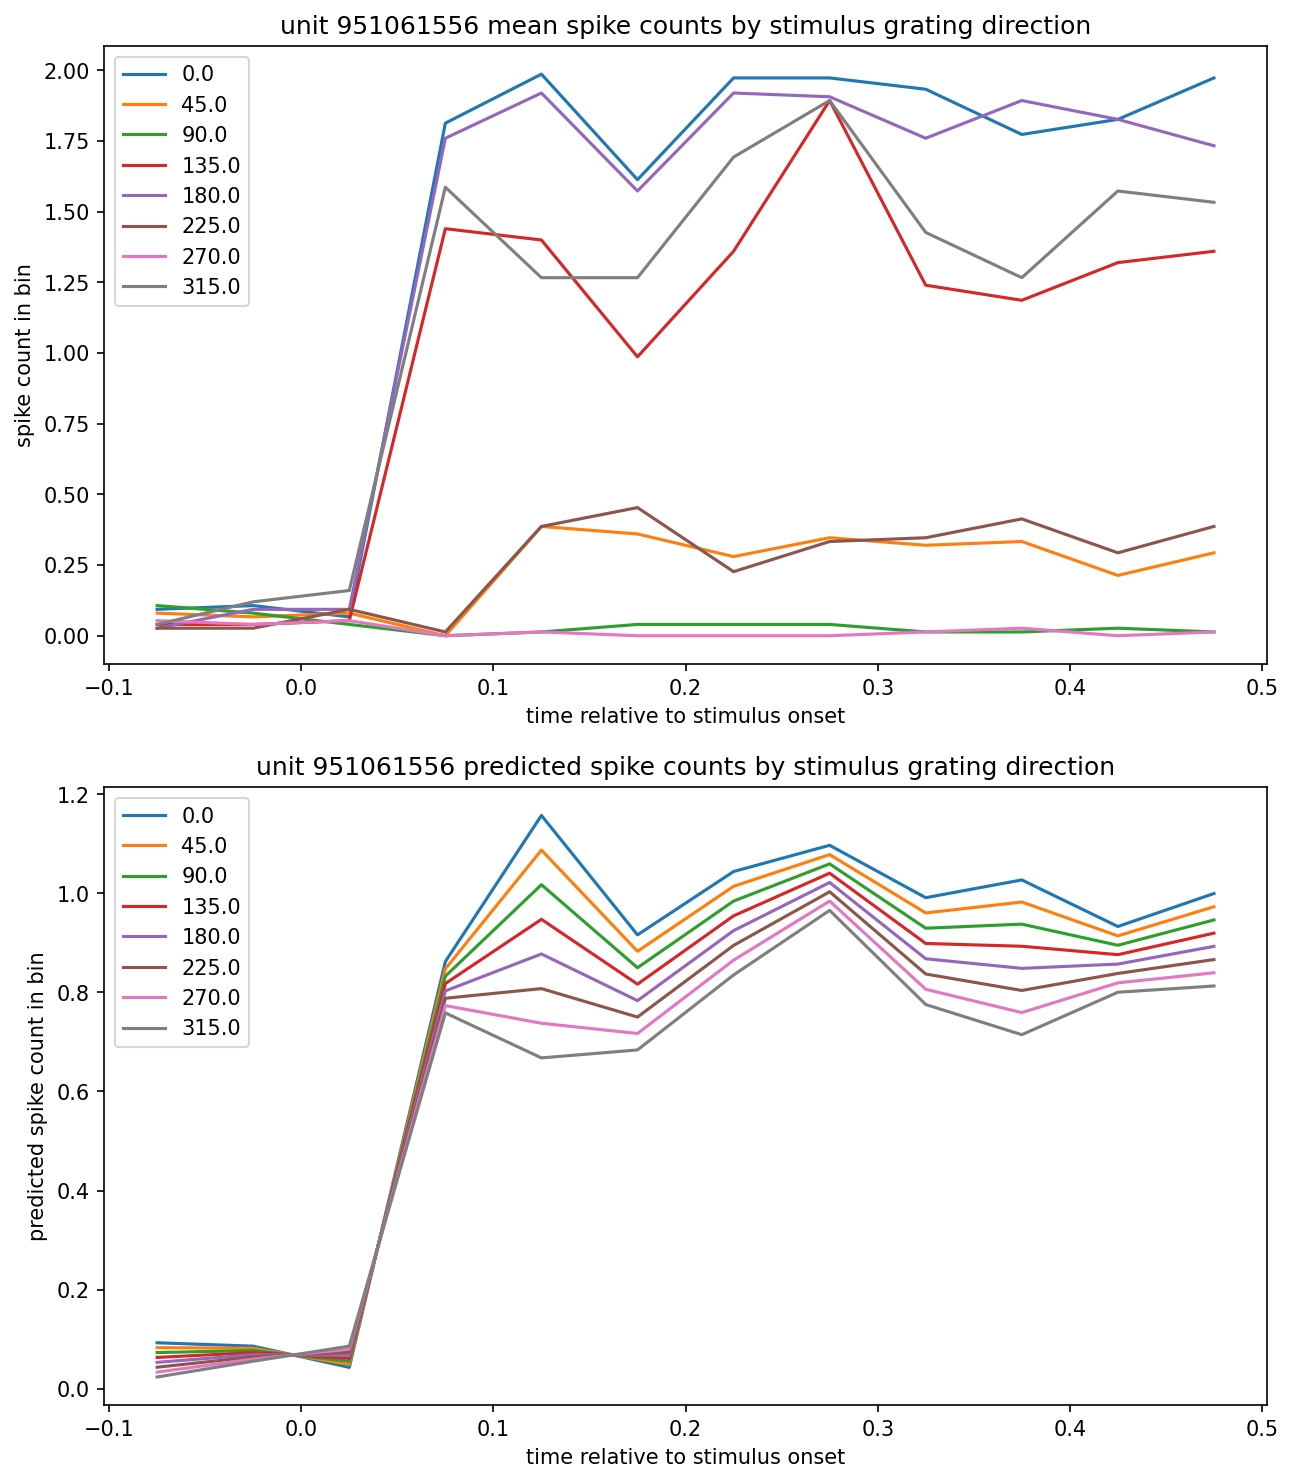

In [10]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(2, 1, figsize=(10, 12), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

The unit shows strong orientation selectivity from the PSTH plot, but our model cannot capture the separation of orientation selecvtity. How can we improve the model?

### Model 3: stimulus + 1 time bin back regression: auto-regressive model

$$ r_t = w^{stim}_t \times s + w^{auto}_{t} \times r_{t-1} $$

Per timestep, is variation in activity better explained by stim direction as well as previous activity?

In [11]:
def get_X_auto_reg(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.stack([orientations, spikes[:, i-1]]).T

auto_reg_results = []
Y_train_preds = []
Y_test_preds = []
for i in range(spikes_train.shape[1]):
    if i >= 1:
        reg = LinearRegression()
        X_train = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test = get_X_auto_reg(spikes_test, orientations_test, i)

        Y_train = spikes_train[:, i]
        reg.fit(X_train, Y_train)
        auto_reg_results.append(reg)

        Y_train_preds.append(reg.predict(X_train))
        Y_test_preds.append(reg.predict(X_test))

In [12]:
train_score = calc_r_squared(spikes_train[:, 1:], np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test[:, 1:], np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3796521752797779
Test Score: 0.35576335856532204


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression')

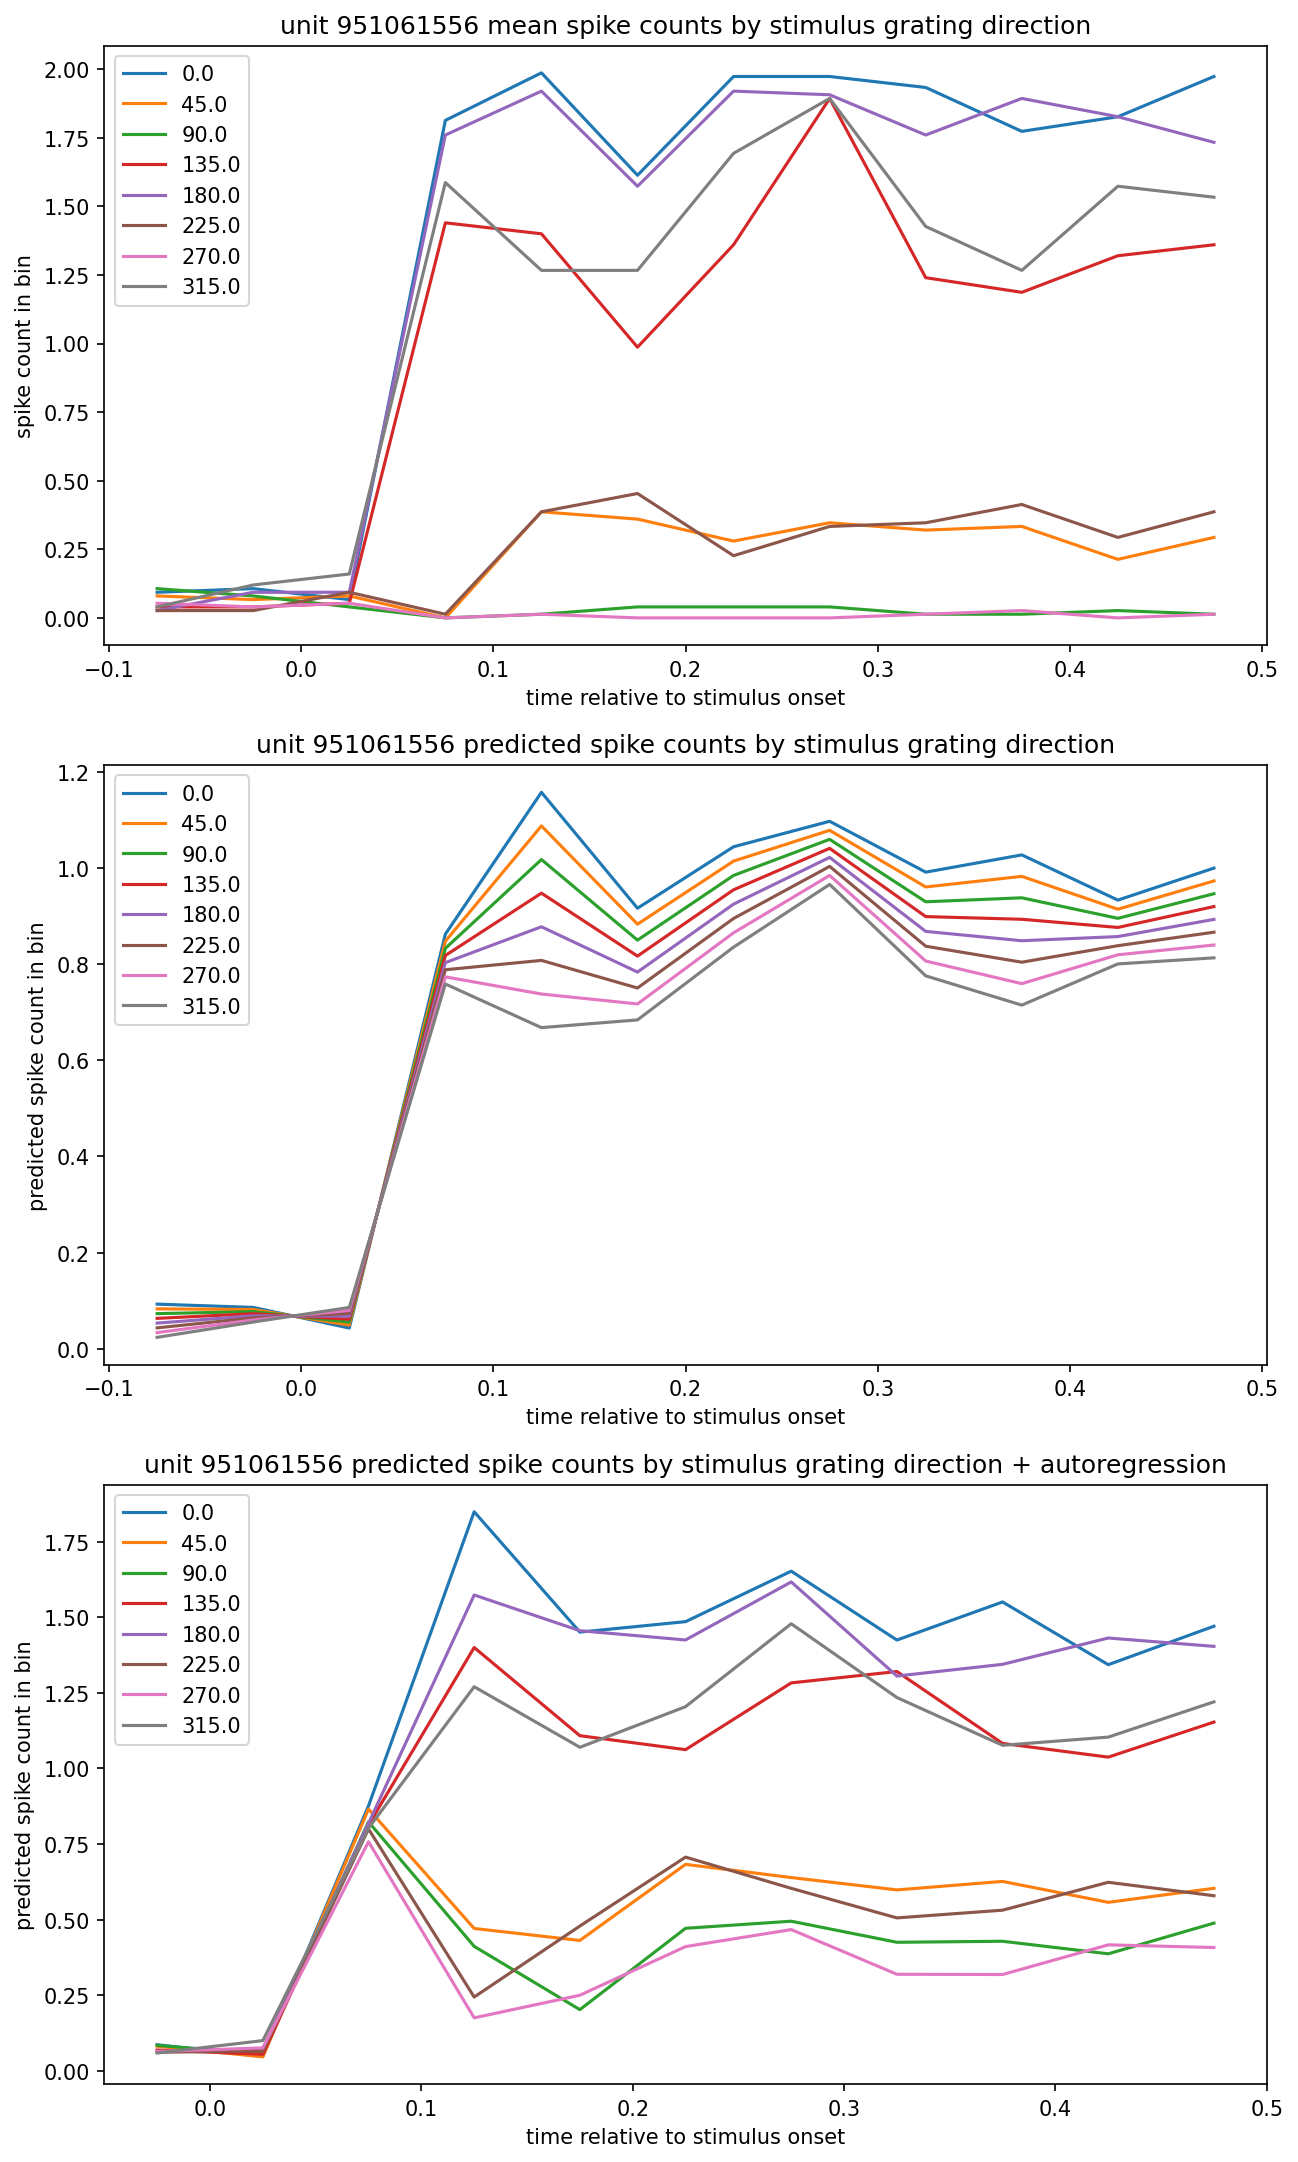

In [13]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), len(auto_reg_results)))
for i, res in enumerate(auto_reg_results):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, unit_id]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg(data, orientations, time_bin_idx)
        Y = res.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression")

The history-dependent model shows orientation selectivity in the unit's activity. How far back from the history is contributing to the current activity?

### Model 4: Same autoregressive model, but what if we added more lag?

$$ r_t = w^{stim}_t \times s + \sum_{l=1}^L w^{auto}_{t,l} \times r_{t-l} $$

How do scores vary with choice of lag $L$ we choose?

In [14]:
def get_X_auto_reg(spikes, orientations, i, T):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
        T: total lag
    """
    orientations = np.expand_dims(orientations, axis=1)
    return np.concatenate([orientations, spikes[:, i-T:i]], axis=1)

train_scores = []
test_scores = []
auto_reg_results = {}

for T in range(1, 10):
    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []
    for i in range(spikes_train.shape[1]):
        if i >= T:
            # should drop the first T bins?
            reg = LinearRegression()
            X_train = get_X_auto_reg(spikes_train, orientations_train, i, T)
            X_test = get_X_auto_reg(spikes_test, orientations_test, i, T)

            Y_train = spikes_train[:, i]
            reg.fit(X_train, Y_train)
            auto_reg_fits.append(reg)

            Y_train_preds.append(reg.predict(X_train))
            Y_test_preds.append(reg.predict(X_test))
    # evaluate bin index [T: )
    train_score = calc_r_squared(spikes_train[:, T:], np.vstack(Y_train_preds).T)
    test_score = calc_r_squared(spikes_test[:, T:], np.vstack(Y_test_preds).T)
    train_scores.append(train_score)
    test_scores.append(test_score)
    auto_reg_results[T] = auto_reg_fits

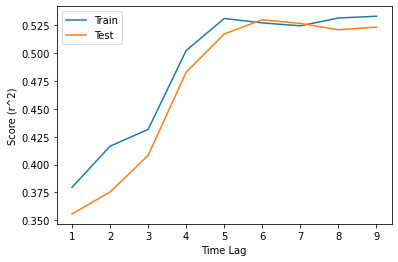

In [15]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), train_scores, label="Train")
ax.plot(range(1, 10), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score (r^2)")
ax.legend()

The score plateus at 5 time bin back, which is 250ms.

## How do auto-regressive coefficients change over the course of a trial?

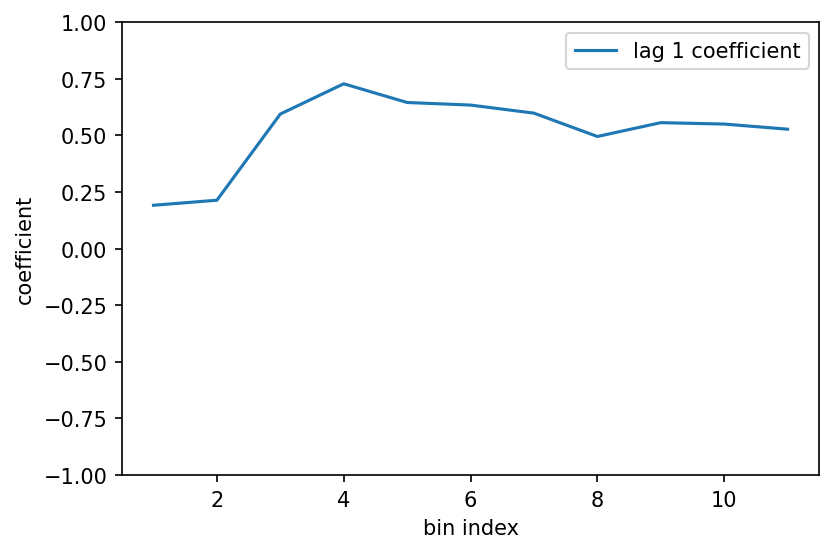

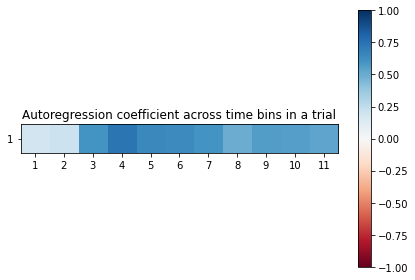

In [16]:
# use time_lag=1 model as an exmaple

lag_model = 1
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[1:])
reg_coeff = np.array(reg_coeff)

# plot
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j} coefficient')
ax.set_xlabel("bin index")
ax.set_ylabel("coefficient")
ax.set_ylim(-1, 1)
ax.legend()


fig, ax = plt.subplots()
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_title("Autoregression coefficient across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

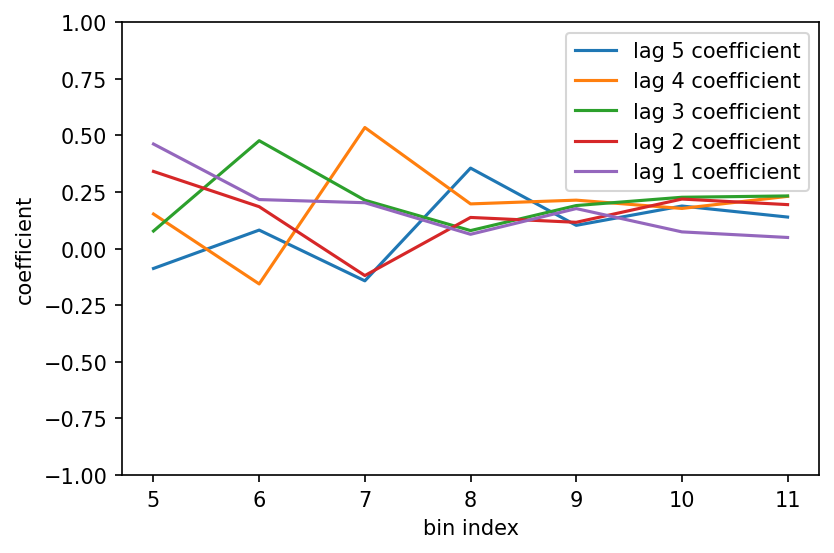

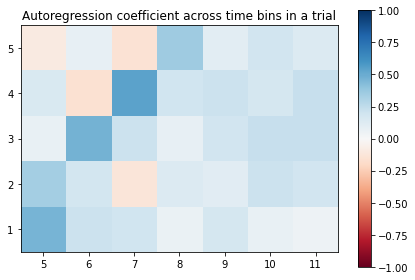

In [17]:
# use time_lag=5 model as an exmaple

lag_model = 5
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[1:])
reg_coeff = np.array(reg_coeff)

# plot
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j} coefficient')
ax.set_xlabel("bin index")
ax.set_ylabel("coefficient")
ax.set_ylim(-1, 1)
ax.legend()


fig, ax = plt.subplots()
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_title("Autoregression coefficient across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

### Model 5: Auto-regressive model with shared weights: 
The plots above reveal that maybe we don't need to a separate model for each time point - we can introduce a set of shared weights (kernel) for the regressors (stimulus and past activity) for all the time points.
$$ r(t) = w^{stim} \times s(t) + \sum_{l=1}^{L_{auto}} w^{auto}_{l} \times r(t-l) = w^{stim} \times s(t) + \mathbf{w}^{auto} \circledast \mathbf{r} $$

### stimulus-based regression + autoregression with fixed weights across time bins
### stimulus + 1 time bin back

In [18]:
def get_X_auto_reg(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.stack([orientations, spikes[:, i-1]]).T

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    if i >= 1:
        X_train_i = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i]
        Y_test_i = spikes_test[:, i]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.array(X_train).reshape(-1, 2)
X_test = np.array(X_test).reshape(-1, 2)
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

In [19]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3390309852961072
Test Score: 0.31961728527890965


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression, fixed weight')

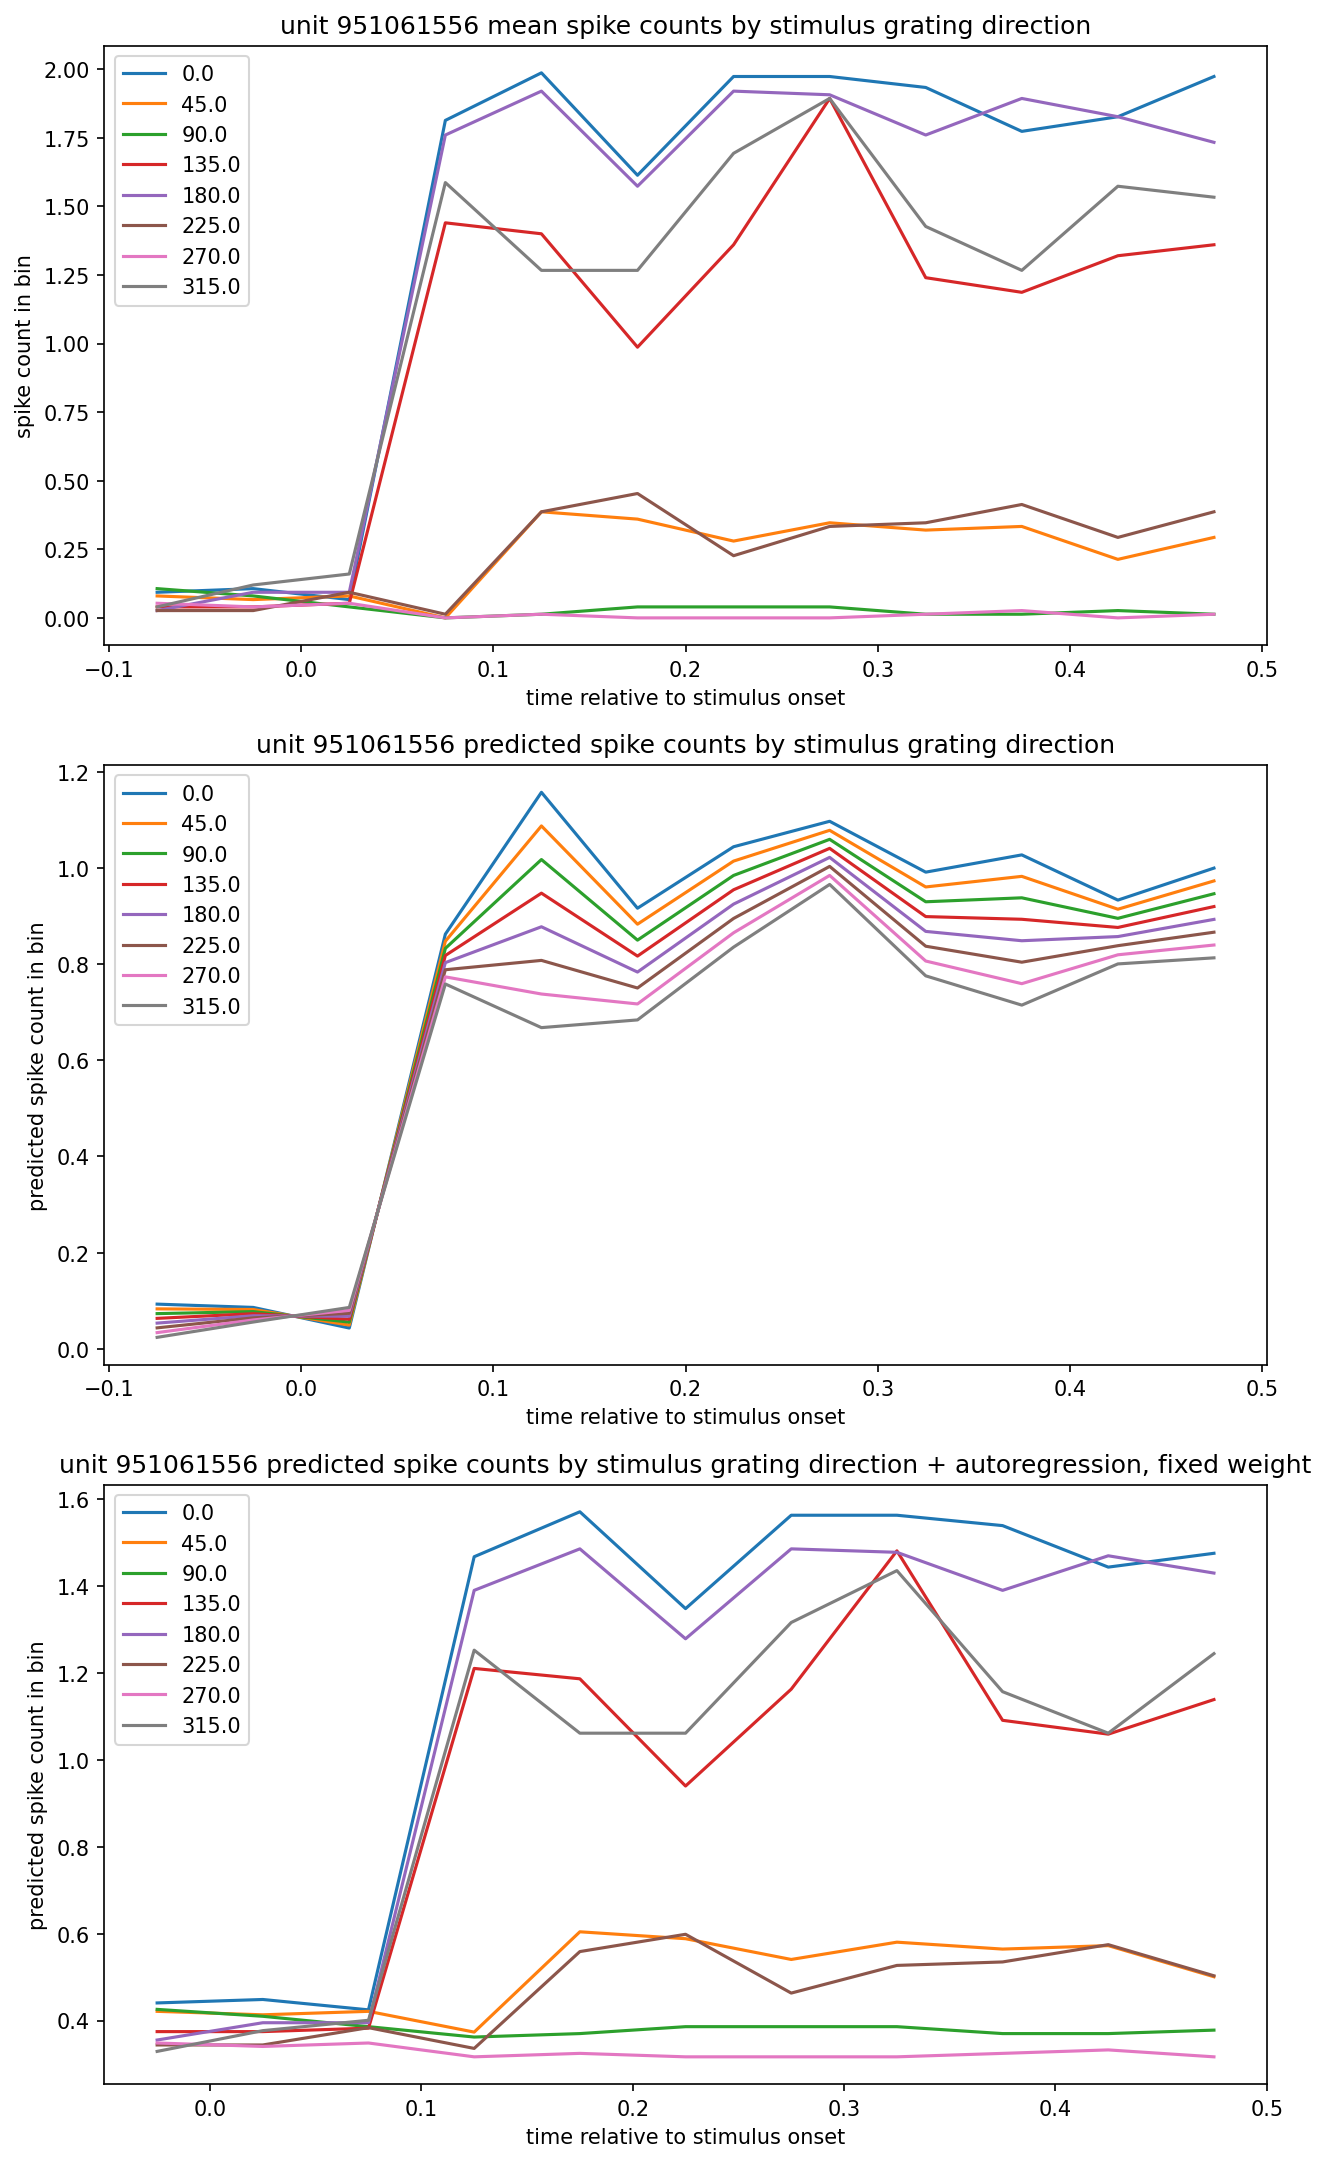

In [20]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), spikes_train.shape[1]-1))
for i in range(spikes_train.shape[1]-1):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, unit_id]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg(data, orientations, time_bin_idx)
        Y = reg.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression, fixed weight")

Observation: the model with shared weights performs similarly well with time-varying weight models, and can capture the oreintation selectivity of this unit

### How far back to the history will influence the current activity

In [21]:
def get_X_auto_reg(spikes, orientations, i, T):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
        T: total lag
    """
    orientations = np.expand_dims(orientations, axis=1)
    return np.concatenate([orientations, spikes[:, i-T:i]], axis=1)


auto_reg_fixed_weights_fits = []
train_scores = []
test_scores = []

for T in range(1, 10):
    print(f'fitting model of lag {T}')
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= T:
            X_train_i = get_X_auto_reg(spikes_train, orientations_train, i, T)
            X_test_i = get_X_auto_reg(spikes_test, orientations_test, i, T)
            Y_train_i = spikes_train[:, i]
            Y_test_i = spikes_test[:, i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, T+1)
    X_test = np.array(X_test).reshape(-1, T+1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    auto_reg_fixed_weights_fits.append(reg)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    # evaluate bin index [T: )
    train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
    test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))
    train_scores.append(train_score)
    test_scores.append(test_score)

fitting model of lag 1
fitting model of lag 2
fitting model of lag 3
fitting model of lag 4
fitting model of lag 5
fitting model of lag 6
fitting model of lag 7
fitting model of lag 8
fitting model of lag 9


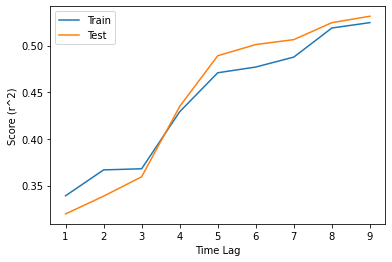

In [22]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), train_scores, label="Train")
ax.plot(range(1, 10), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score (r^2)")
ax.legend()

Performance of the model with shared weights increases as we include more lags as regressors

### check regression coefficients
now let's take a look at what regression coefficients might tell us from the fixed weight model

In [23]:
model_lag = 1
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
print(f'lag-{model_lag} model coefficients')
print(f' {reg_model.coef_[0, 1:]}')

model_lag = 5
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
print(f'lag-{model_lag} model coefficients')
print(f' {reg_model.coef_[0, 1:]}')

lag-1 model coefficients
 [0.59690098]
lag-5 model coefficients
 [0.00999872 0.14720429 0.19181358 0.21902063 0.28316707]


Observation: the coefficient decays as the lag goes back, indicating that the influence of past activity on present neural activity gradually decreases as time goes on.

### Model 6: Models with activities from other neurons
How can we examine the interaction among units and how it might contribute to neural dynamics?

$$ r_i(t) = w^{stim} \times s(t) + \sum_{j=1}^{N_{units}} w^{inter}_{ij} \times r_j(t-1)$$
assuming we only use lag-1 model here, as its influence is the strongest.

In [24]:
# using the list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
target_unit_id = 951061556

random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = histograms.loc[train_idxs, :, interesting_units].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = histograms.loc[test_idxs, :, interesting_units].values

### stimulus + 1 time bin back

In [25]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.concatenate([orientations[:, None], spikes[:, i-1, :]], axis=1)

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    if i >= 1:
        X_train_i = get_X_auto_reg_population(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg_population(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i, 0]
        Y_test_i = spikes_test[:, i, 0]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.array(X_train).reshape(-1, len(interesting_units)+1)
X_test = np.array(X_test).reshape(-1, len(interesting_units)+1)
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

print(X_train.shape)
print(Y_train.shape)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

(5280, 7)
(5280, 1)


In [26]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.3500153671455981
Test Score: 0.32612600316033336


Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction + autoregression + population, fixed weight')

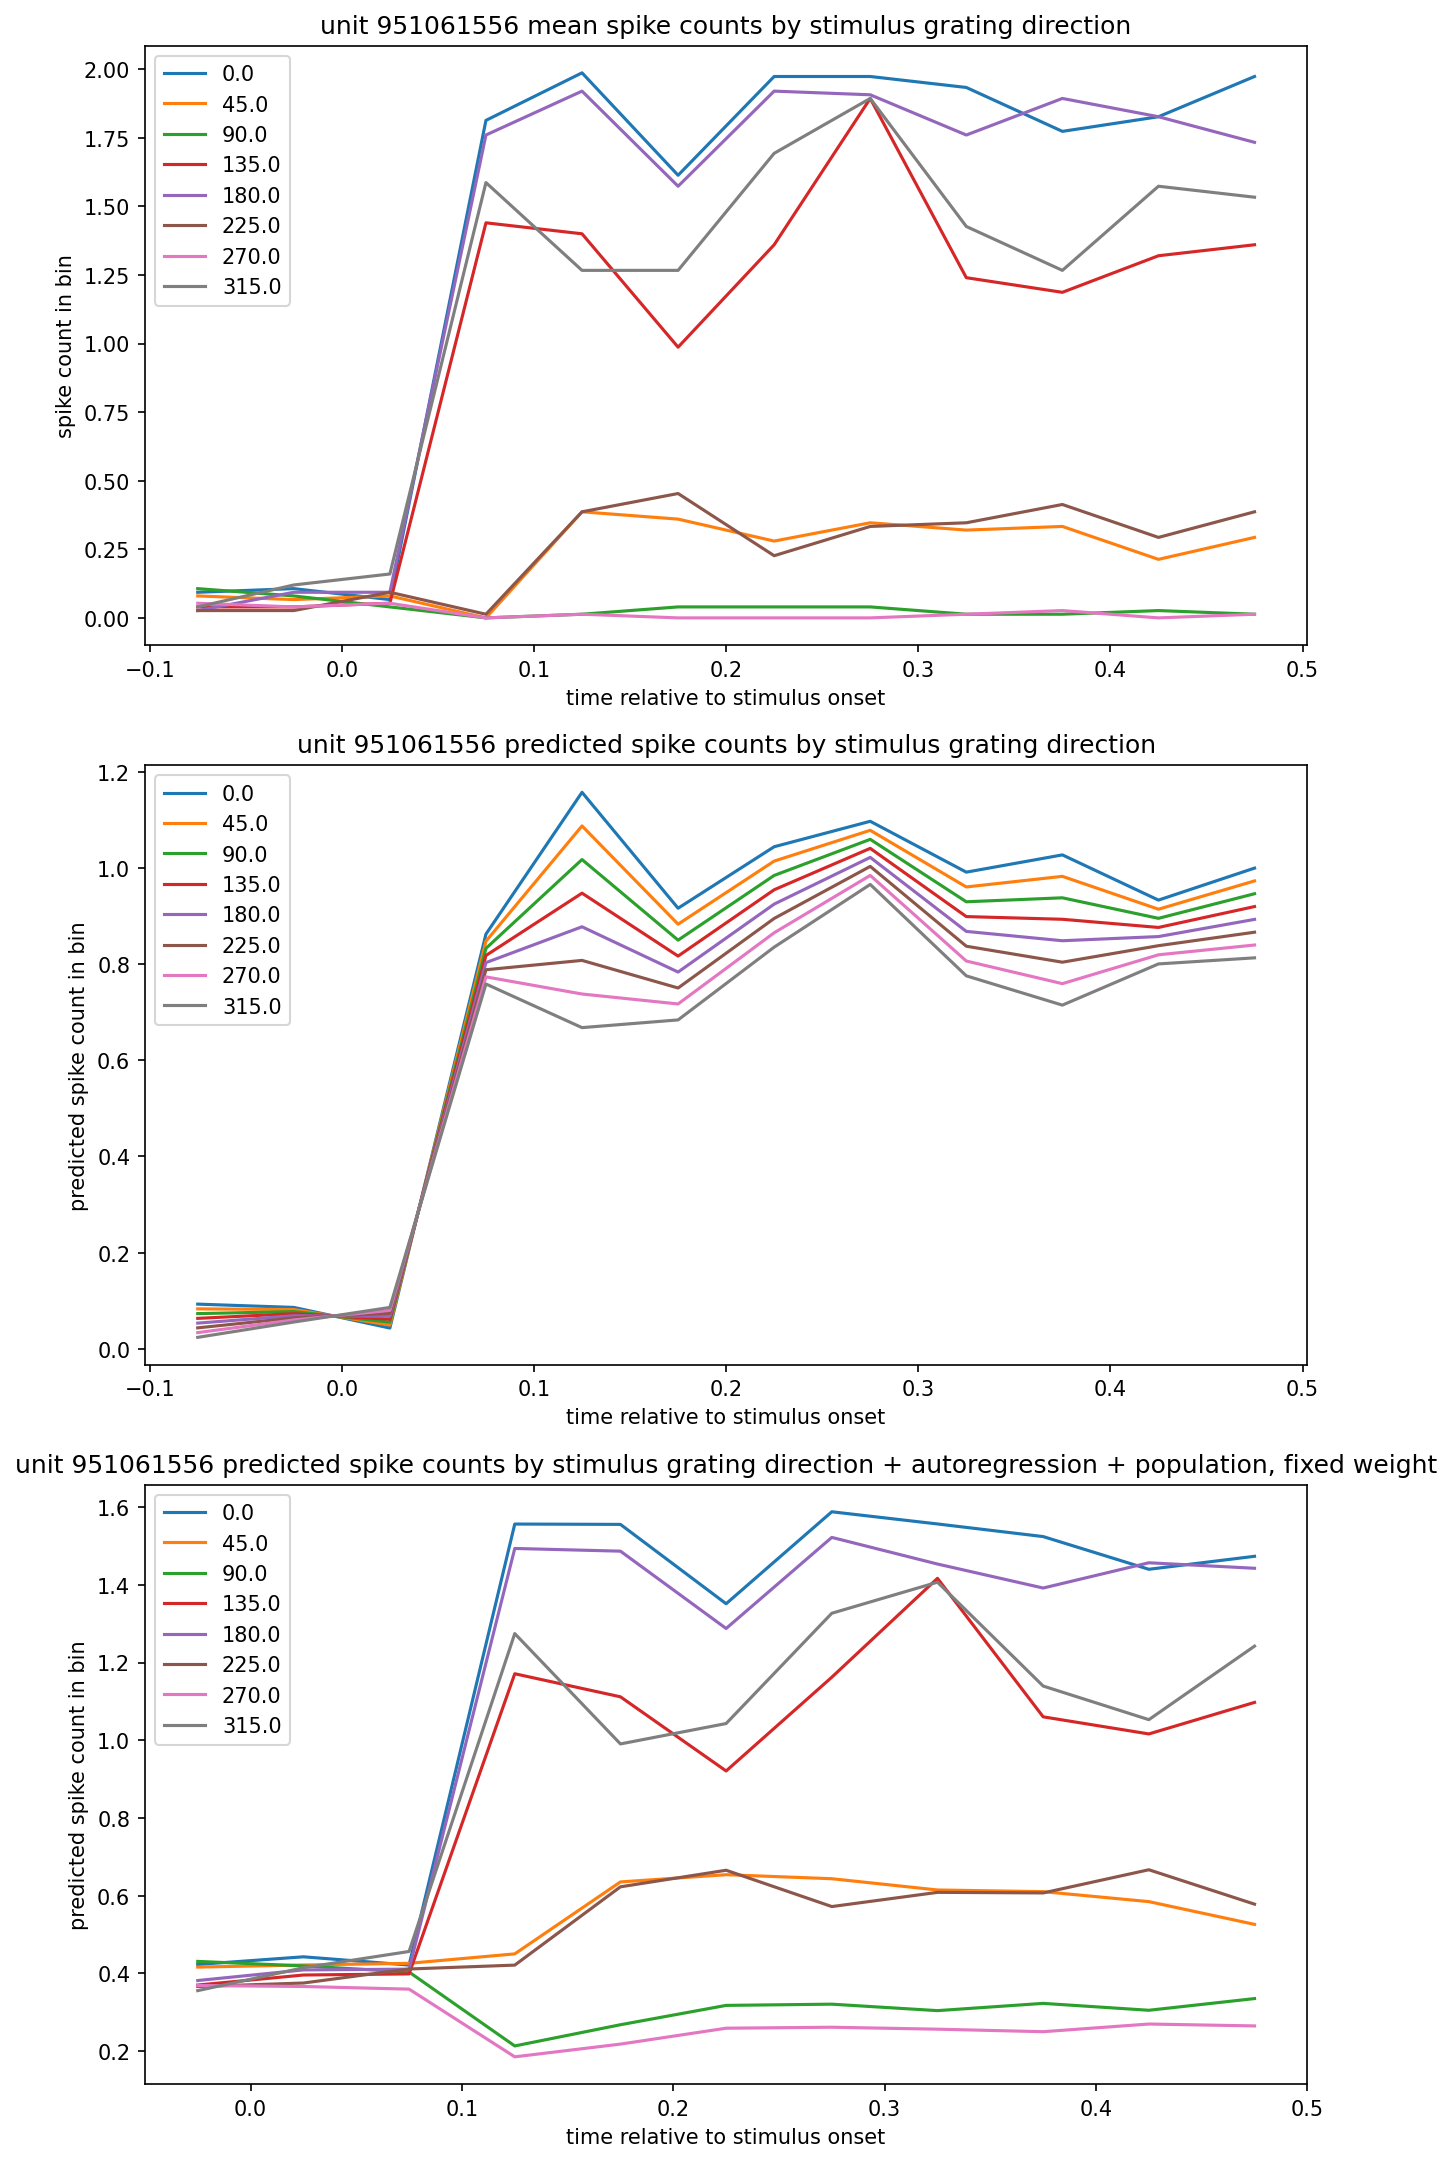

In [27]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(3, 1, figsize=(10, 18), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


# stimulus-based regression
pred_responses = []
for res in lin_reg_results:
    pred_responses.append(res.predict(unique_orientations.reshape(-1,1)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")

# plot auto regressive model means
pred_mean_responses = np.empty((len(unique_orientations), spikes_train.shape[1]-1))
for i in range(spikes_train.shape[1]-1):
    time_bin_idx = i + 1
    for j, orientation in enumerate(unique_orientations):
        trial_ids = presentations[presentations.orientation == orientation].index.values     
        orientations = np.repeat(orientation, len(trial_ids))
        data = histograms.loc[trial_ids, :, interesting_units]
        # X = np.stack([unique_orientations, pred_responses[-1]]).T
        X = get_X_auto_reg_population(data, orientations, time_bin_idx)
        Y = reg.predict(X)
        pred_mean_responses[j, i] = np.mean(Y)

for j, orientation in enumerate(unique_orientations):
    ax[2].plot(data["time_relative_to_stimulus_onset"][1:], pred_mean_responses[j, :], label=orientation)
ax[2].legend()
ax[2].set_xlabel("time relative to stimulus onset")
ax[2].set_ylabel("predicted spike count in bin")
ax[2].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction + autoregression + population, fixed weight")

### Examine influence from other neurons

In [28]:
print(f'target_unit: {target_unit_id}')
for i, unit in enumerate(interesting_units):
    print(f' unit {unit} coeff: {reg.coef_[0, i+1]}')


target_unit: 951061556
 unit 951061556 coeff: 0.5756899598723371
 unit 951061574 coeff: 0.005059117773624364
 unit 951061715 coeff: -0.05944743197114983
 unit 951061906 coeff: 0.07031319059286055
 unit 951061918 coeff: 0.05136750903213658
 unit 951061957 coeff: 0.1679648885438938


Observation: 
- dependence on self previous activity is the strongest (weight 0.58).
- some unit exerts excitatory effect: positive weight
- some unit might exert inhibitory effect: negative weight

### Population prediction
let's look at multiple neurons at the same time.

In [29]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.concatenate([orientations[:, None], spikes[:, i-1, :]], axis=1)


X_train_dict, Y_train_dict = {}, {}
X_test_dict, Y_test_dict = {}, {}
reg_dict = {}
Y_train_preds_dict = {}
Y_test_preds_dict = {}


for unit_i, unit in enumerate(interesting_units):
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= 1:
            X_train_i = get_X_auto_reg_population(spikes_train, orientations_train, i)
            X_test_i = get_X_auto_reg_population(spikes_test, orientations_test, i)
            Y_train_i = spikes_train[:, i, unit_i]
            Y_test_i = spikes_test[:, i, unit_i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, len(interesting_units)+1)
    X_test = np.array(X_test).reshape(-1, len(interesting_units)+1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    X_train_dict[unit] = X_train
    Y_train_dict[unit] = Y_train
    X_test_dict[unit] = X_test
    Y_test_dict[unit] = Y_test
    reg_dict[unit] = reg
    Y_train_preds_dict[unit] = Y_train_preds
    Y_test_preds_dict[unit] = Y_test_preds


In [30]:
for unit in interesting_units:
    print(f'target_unit: {unit}')
    for i, unit_coeff in enumerate(interesting_units):
        print(f' unit {unit_coeff} coeff: {reg_dict[unit].coef_[0, i+1]}')

target_unit: 951061556
 unit 951061556 coeff: 0.5756899598723371
 unit 951061574 coeff: 0.005059117773624364
 unit 951061715 coeff: -0.05944743197114983
 unit 951061906 coeff: 0.07031319059286055
 unit 951061918 coeff: 0.05136750903213658
 unit 951061957 coeff: 0.1679648885438938
target_unit: 951061574
 unit 951061556 coeff: -0.0235707804756021
 unit 951061574 coeff: 0.22264259253835936
 unit 951061715 coeff: -0.031845608499029836
 unit 951061906 coeff: 0.01794762182466916
 unit 951061918 coeff: 0.20931523875195096
 unit 951061957 coeff: 0.18067750846133698
target_unit: 951061715
 unit 951061556 coeff: -0.02337803752648139
 unit 951061574 coeff: -0.004362442664206652
 unit 951061715 coeff: 0.19851181993346137
 unit 951061906 coeff: 0.1492934768342772
 unit 951061918 coeff: -0.0070693768879065534
 unit 951061957 coeff: -0.012543106157103554
target_unit: 951061906
 unit 951061556 coeff: 0.011558076227214192
 unit 951061574 coeff: 0.016977940849415868
 unit 951061715 coeff: 0.014952809701

target_unit: 951061556
target_unit: 951061574
target_unit: 951061715
target_unit: 951061906
target_unit: 951061918
target_unit: 951061957


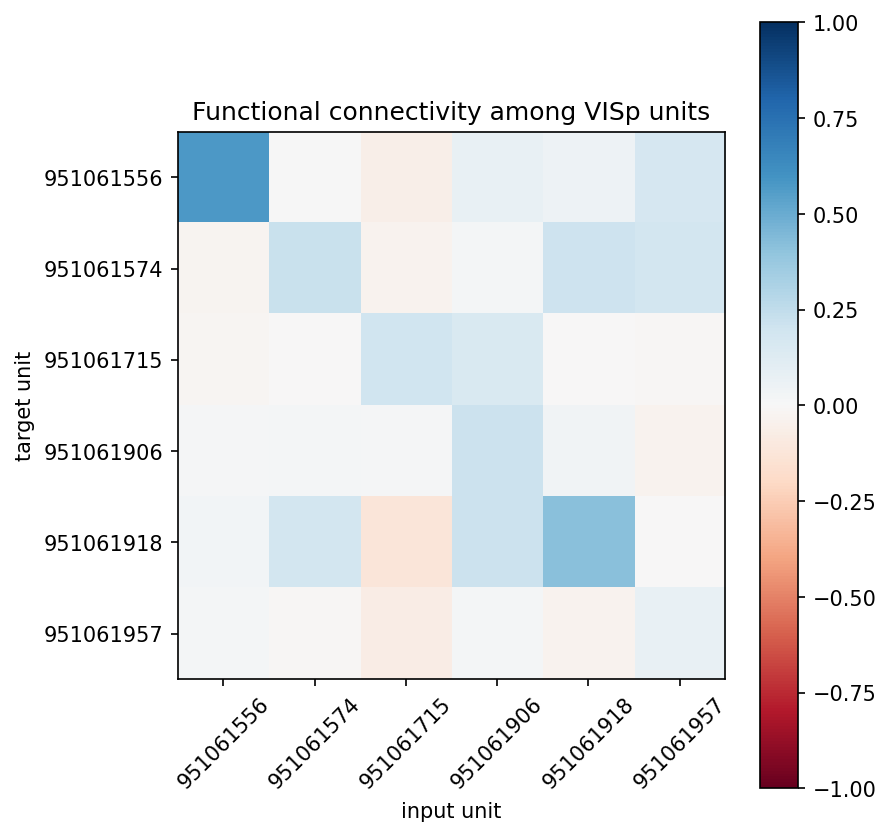

In [31]:
# get functional connectivity matrix
func_conn = []
for unit in interesting_units:
    print(f'target_unit: {unit}')
    func_conn.append(reg_dict[unit].coef_[0, 1:])
func_conn = np.array(func_conn)


fig, ax = plt.subplots(figsize=(6,6), dpi=150)
im = ax.imshow(func_conn, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(interesting_units)))
ax.set_xticklabels(interesting_units, rotation=45)
ax.set_yticks(np.arange(len(interesting_units)))
ax.set_yticklabels(interesting_units)
ax.set_xlabel('input unit')
ax.set_ylabel('target unit')
ax.set_title("Functional connectivity among VISp units")
fig.colorbar(im, ax=ax)
fig.tight_layout()

Observation: 
- diagonal elements are strongly positive, indicating self recurrent effect. 
- unit 951061715 might be an inhibitory unit as its effect on most other units are negative.

### with other brain regions
we can include units from other regions to examine potential interactions among different brain regions.
Here let's use units from the primary visual cortex (VISp) and its upstream area, the lateral geniculate nuclues (LGd), as an example to examine how interaction among units from different brain regions might contibute to neural activity patterns.

In [32]:
units_LGd = session.units[session.units["ecephys_structure_acronym"] == 'LGd']
unit_id_LGd = units_LGd.index.to_list()

histograms_LGd = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=unit_id_LGd
)

In [33]:
# using the list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
spikes_train_with_LGd = np.concatenate([histograms.loc[train_idxs, :, interesting_units].values,
                                        histograms_LGd.loc[train_idxs, :, unit_id_LGd].values], axis=2)

spikes_test_with_LGd = np.concatenate([histograms.loc[test_idxs, :, interesting_units].values,
                                       histograms_LGd.loc[test_idxs, :, unit_id_LGd].values], axis=2)

In [34]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    return np.concatenate([orientations[:, None], spikes[:, i-1, :]], axis=1)


X_train_dict, Y_train_dict = {}, {}
X_test_dict, Y_test_dict = {}, {}
reg_dict = {}
Y_train_preds_dict = {}
Y_test_preds_dict = {}

total_unit = interesting_units+unit_id_LGd

for unit_i, unit in enumerate(total_unit):
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= 1:
            X_train_i = get_X_auto_reg_population(spikes_train_with_LGd, orientations_train, i)
            X_test_i = get_X_auto_reg_population(spikes_test_with_LGd, orientations_test, i)
            Y_train_i = spikes_train_with_LGd[:, i, unit_i]
            Y_test_i = spikes_test_with_LGd[:, i, unit_i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, len(total_unit)+1)
    X_test = np.array(X_test).reshape(-1, len(total_unit)+1)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    X_train_dict[unit] = X_train
    Y_train_dict[unit] = Y_train
    X_test_dict[unit] = X_test
    Y_test_dict[unit] = Y_test
    reg_dict[unit] = reg
    Y_train_preds_dict[unit] = Y_train_preds
    Y_test_preds_dict[unit] = Y_test_preds


target_unit: 951061556
target_unit: 951061574
target_unit: 951061715
target_unit: 951061906
target_unit: 951061918
target_unit: 951061957
target_unit: 951060149
target_unit: 951060126
target_unit: 951060091
target_unit: 951060134
target_unit: 951060162
target_unit: 951060157
target_unit: 951060187
target_unit: 951060191


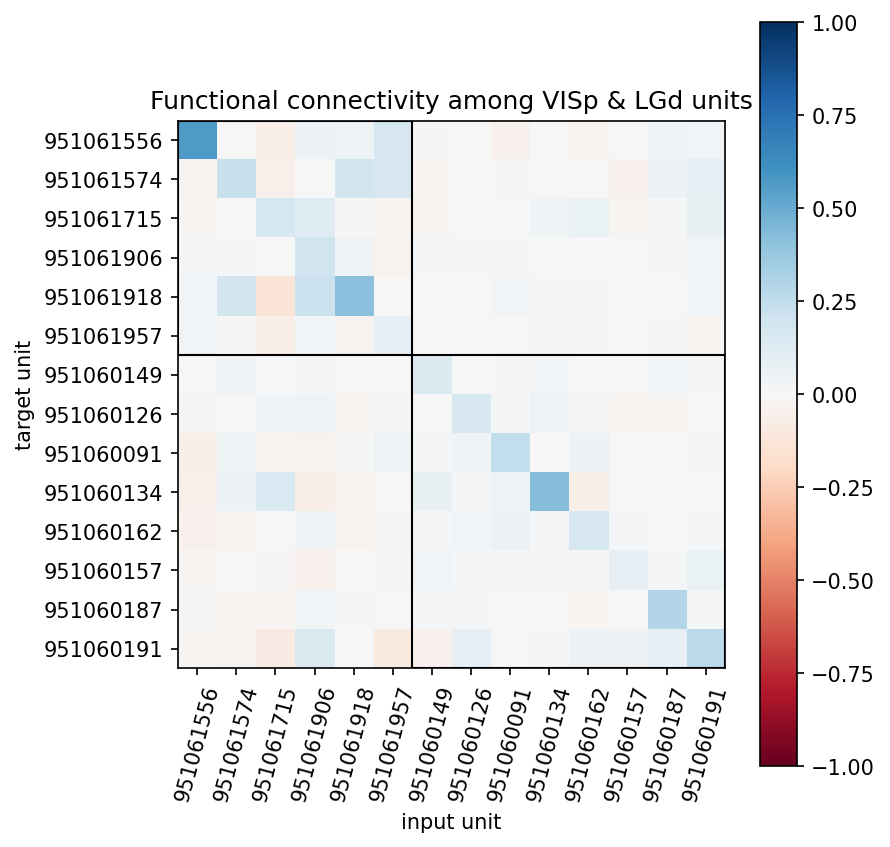

In [35]:
# get functional connectivity matrix
func_conn = []
for unit in total_unit:
    print(f'target_unit: {unit}')
    func_conn.append(reg_dict[unit].coef_[0, 1:])
func_conn = np.array(func_conn)

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6,6), dpi=150)
im = ax.imshow(func_conn, cmap='RdBu', vmin=-1, vmax=1)
ax.add_patch(Rectangle((-0.5, -0.5), len(interesting_units), len(interesting_units), 
             edgecolor='black', facecolor='red', fill=False, lw=1))
ax.add_patch(Rectangle((-0.5+len(interesting_units), -0.5+len(interesting_units)), 
                    len(unit_id_LGd), len(unit_id_LGd), 
             edgecolor='black', facecolor='red', fill=False, lw=1))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(total_unit)))
ax.set_xticklabels(total_unit, rotation=75)
ax.set_yticks(np.arange(len(total_unit)))
ax.set_yticklabels(total_unit)
ax.set_xlabel('input unit')
ax.set_ylabel('target unit')
ax.set_title("Functional connectivity among VISp & LGd units")
fig.colorbar(im, ax=ax)
fig.tight_layout()

Observation
- Again, digonal elements indicate strong autocorrelation of neural activity
- in general the weights from VISp to LGd is more negative (the lower left quadrant), perhaps indicating the top-down feedback inhibition from VISp to LGd?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> 2. Consider nonlinear relationships between neural responses and features. How can we extend the regression model to capture this relationship? Some examples include: regression with sine/ cosine basis of orientation value, polynomials basis, or parametrized nonlinear function (e.g. Von Mises). How do they compare and contrast? </h2>
</div>

### Re-run linear regression with sine/cosine features
Note: we run into a bit of issue here since the stim traditionally is expressed in degrees (0, 45, 90 etc.) However, since we're introducing a time component, it'd make sense to differentiate when the stim is on vs. off, as well as the direction of the stim. Just using degrees doesn't allow us to do this, since 0 degrees != stim-off. One idea would be to translate the stim degrees as x,y cosine and sine components, and have x=0,y=0 indicate stim-off. 

In [36]:
def get_sines_cosines_from_orientations(orientations):
    """
    Takes in orientations as degrees
    returns sines and cosines as np array of dims data_points x 2
    """
    radians = orientations.astype(float) * np.pi / 180
    sines = np.sin(radians)
    cosines = np.cos(radians)
    two_sines = np.sin(radians*2)
    two_cosines = np.cos(radians*2)
    return np.vstack([cosines, sines, two_sines, two_cosines]).T


In [37]:
# get the target unit data
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

unit_id = 951061556
orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = histograms.loc[train_idxs, :, unit_id].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = histograms.loc[test_idxs, :, unit_id].values

def calc_r_squared(y_true, y_pred):
    """
    Calculates r^2 metric for true vs predicted labels
    NOTE: could also use .score() from sklearn LinearRegression here, but it's a bit unfitting since
    we'd want to evaluate r^2 for all time points, but are sometimes training different models for each time point. 
    Args: 
        y_true, y_pred of any shape
    """
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(((y_true - y_true.mean()) ** 2))


In [38]:
spikes_train.shape

(480, 12)

In [39]:
sin_cos_results = []
Y_train_preds = []
Y_test_preds = []

for t in range(spikes_train.shape[1]):
    reg = LinearRegression()
    X = get_sines_cosines_from_orientations(orientations_train)
    Y = spikes_train[:, t]
    reg.fit(X, Y)
    sin_cos_results.append(reg)
    Y_train_preds.append(reg.predict(get_sines_cosines_from_orientations(orientations_train)))
    Y_test_preds.append(reg.predict(get_sines_cosines_from_orientations(orientations_test)))

In [40]:
train_score = calc_r_squared(spikes_train, np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test, np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.5092055385249938
Test Score: 0.49837850503784065


Observation: the test score is on par with Model 2 in the workshop.

Text(0.5, 1.0, 'unit 951061556 mean spike counts by stimulus grating direction')

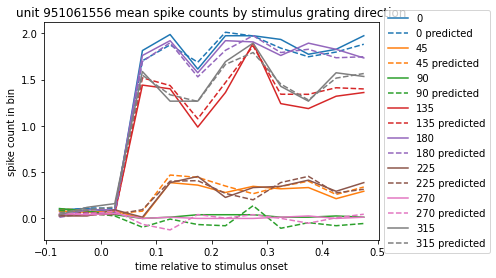

In [41]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots()
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = histograms.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    line, = ax.plot(data["time_relative_to_stimulus_onset"], mean, label=int(orientation))
    predictions = [reg.predict(get_sines_cosines_from_orientations(np.array([orientation]))) for reg in sin_cos_results]
    ax.plot(data["time_relative_to_stimulus_onset"], np.stack(predictions).squeeze(), color=line.get_color(), linestyle="--", label=f"{int(orientation)} predicted")
lgd_bbox_to_anchor = (1., 0.5)
lgd_loc = "center left"
ax.legend(bbox_to_anchor=lgd_bbox_to_anchor, loc=lgd_loc)
ax.set_xlabel("time relative to stimulus onset")
ax.set_ylabel("spike count in bin")
ax.set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")

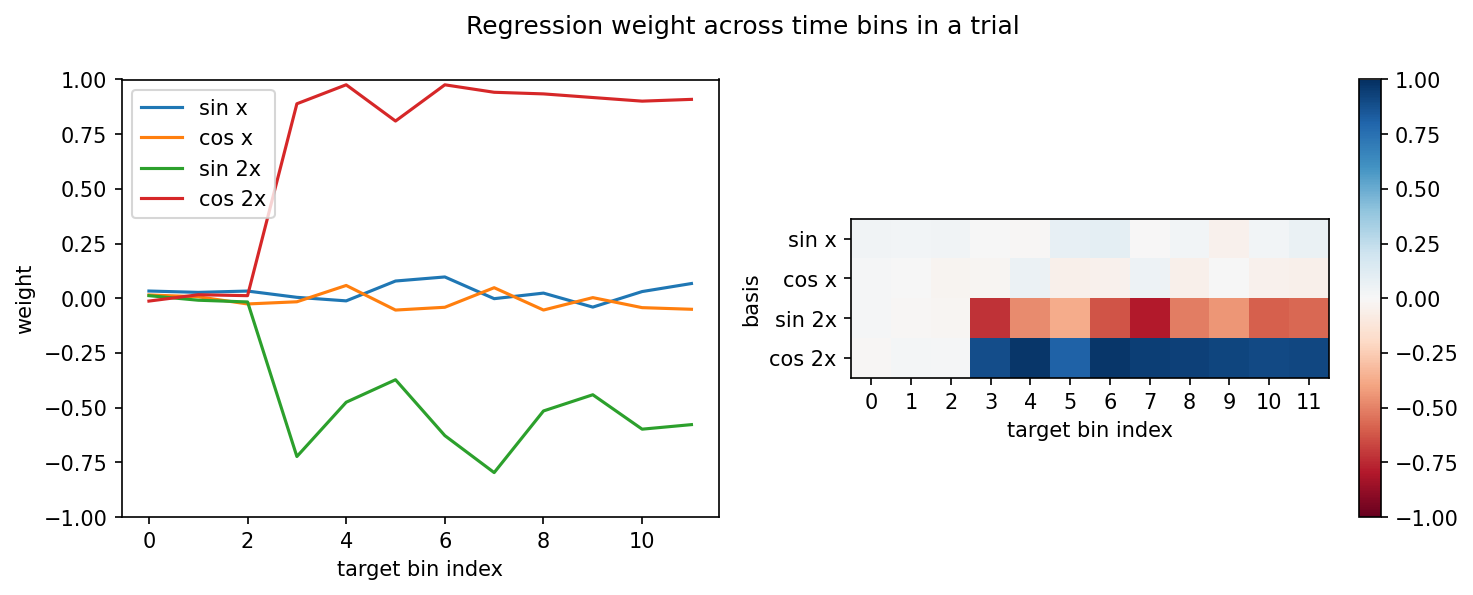

In [42]:
# look at regression weight
reg_coeff = []
for reg in sin_cos_results:
    reg_coeff.append(reg.coef_)
reg_coeff = np.array(reg_coeff)

# plot
basis_set = ['sin x', 'cos x', 'sin 2x', 'cos 2x']
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

ax = axs[0]
for j in range(reg_coeff.shape[1]):
    ax.plot(reg_coeff[:, j], 
            label=f'{basis_set[j]}')
ax.set_ylim(-1, 1)
ax.set_xlabel("target bin index")
ax.set_ylabel("weight")
ax.legend()

ax = axs[1]
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(12))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(basis_set)
ax.set_xlabel("target bin index")
ax.set_ylabel("basis")

fig.suptitle("Regression weight across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

Observation:
- Coefficients of "sin x" and "cos x" are 0.
- Coefficients of "sin 2x" is 0 initially and drops to -0.75 after the stimulus presentation.
- Coefficients of "cos 2x" is 0 initially and rises to 1.0 after the stimulus presentation.
- The above indicate that this unit is orientation selective but not sensitive to direction.